# Analisando coleções

In [13]:
import matplotlib.pyplot as plt
plt.style.use('default')
import numpy as np
import unidecode
import urllib
import string

In [14]:
stopwords_list = urllib.request.urlopen("https://gist.githubusercontent.com/rg089/35e00abf8941d72d419224cfd5b5925d/raw/12d899b70156fd0041fa9778d657330b024b959c/stopwords.txt").read().decode()
stopwords_en = set(stopwords_list.split())
stopwords_en.remove("not") 

In [15]:
from sklearn.feature_extraction.text import CountVectorizer
s = ['meu primeiro documento é meu', 'meu segundo documento é meu também']
vectorizer = CountVectorizer(ngram_range=(1,4))
x = vectorizer.fit_transform(s)
print(x)
print(vectorizer.vocabulary_)

  (0, 3)	2
  (0, 11)	1
  (0, 0)	1
  (0, 4)	1
  (0, 12)	1
  (0, 1)	1
  (0, 5)	1
  (0, 13)	1
  (0, 6)	1
  (1, 3)	2
  (1, 0)	1
  (1, 1)	1
  (1, 14)	1
  (1, 18)	1
  (1, 7)	1
  (1, 15)	1
  (1, 10)	1
  (1, 8)	1
  (1, 16)	1
  (1, 2)	1
  (1, 9)	1
  (1, 17)	1
{'meu': 3, 'primeiro': 11, 'documento': 0, 'meu primeiro': 4, 'primeiro documento': 12, 'documento meu': 1, 'meu primeiro documento': 5, 'primeiro documento meu': 13, 'meu primeiro documento meu': 6, 'segundo': 14, 'também': 18, 'meu segundo': 7, 'segundo documento': 15, 'meu também': 10, 'meu segundo documento': 8, 'segundo documento meu': 16, 'documento meu também': 2, 'meu segundo documento meu': 9, 'segundo documento meu também': 17}


## Lidando com coleções

In [16]:
import pandas as pd

df = pd.read_csv('./datasets/IMDB Dataset.csv')

df.head()

,review,sentiment
0,One of the other reviewers has mentioned that ...,positive
1,A wonderful little production. <br /><br />The...,positive
2,I thought this was a wonderful way to spend ti...,positive
3,Basically there's a family where a little boy ...,negative
4,"Petter Mattei's ""Love in the Time of Money"" is...",positive


In [17]:
reviews = [s for s in df['review']]
vectorizer = CountVectorizer(stop_words = stopwords_en)
x = vectorizer.fit_transform(reviews)


/home/user/.local/lib/python3.8/site-packages/sklearn/feature_extraction/text.py:396: UserWarning: Your stop_words may be inconsistent with your preprocessing. Tokenizing the stop words generated tokens ['articl', 'mon'] not in stop_words.
  warnings.warn(


In [18]:
vec_bin = CountVectorizer(binary=True)
X = vec_bin.fit_transform(reviews)
A = X.sum(axis=1)


In [19]:
list(zip(A, vec_bin.vocabulary_.keys()))

[(matrix([[186]]), 'one'),
 (matrix([[107]]), 'of'),
 (matrix([[114]]), 'the'),
 (matrix([[83]]), 'other'),
 (matrix([[139]]), 'reviewers'),
 (matrix([[90]]), 'has'),
 (matrix([[97]]), 'mentioned'),
 (matrix([[108]]), 'that'),
 (matrix([[89]]), 'after'),
 (matrix([[25]]), 'watching'),
 (matrix([[74]]), 'just'),
 (matrix([[109]]), 'oz'),
 (matrix([[231]]), 'episode'),
 (matrix([[73]]), 'you'),
 (matrix([[34]]), 'll'),
 (matrix([[98]]), 'be'),
 (matrix([[82]]), 'hooked'),
 (matrix([[135]]), 'they'),
 (matrix([[86]]), 'are'),
 (matrix([[91]]), 'right'),
 (matrix([[201]]), 'as'),
 (matrix([[107]]), 'this'),
 (matrix([[49]]), 'is'),
 (matrix([[169]]), 'exactly'),
 (matrix([[98]]), 'what'),
 (matrix([[78]]), 'happened'),
 (matrix([[285]]), 'with'),
 (matrix([[100]]), 'me'),
 (matrix([[83]]), 'br'),
 (matrix([[335]]), 'first'),
 (matrix([[271]]), 'thing'),
 (matrix([[202]]), 'struck'),
 (matrix([[73]]), 'about'),
 (matrix([[352]]), 'was'),
 (matrix([[148]]), 'its'),
 (matrix([[198]]), 'brutal

## Agregando coleções

90310


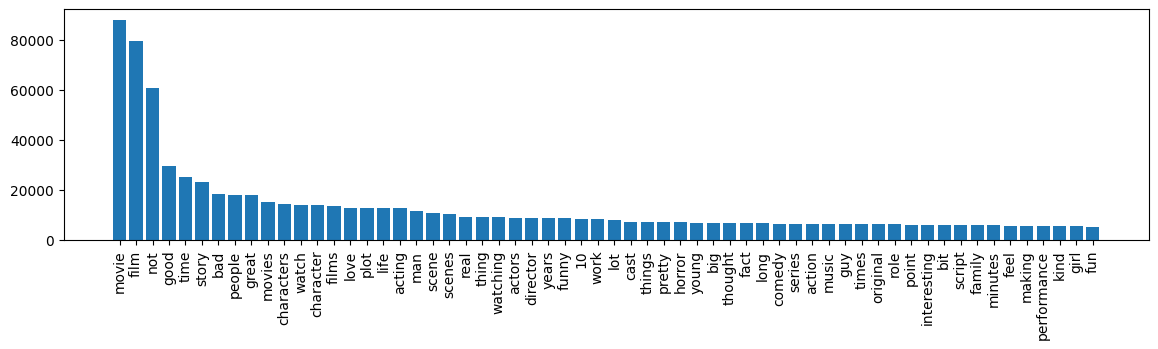

In [20]:
# Ideia: somar a frequência de cada palavra ao longo de toda a coleção
x_ = np.sum(x, axis=0)

tuplas = [ (x_[0,vectorizer.vocabulary_[i]], i) for i in vectorizer.vocabulary_.keys() ]
tuplas_ordenadas = sorted(tuplas, reverse=True) # reverse=True pede uma ordenação em ordem decrescente
palavras = [ t[1] for t in tuplas_ordenadas ]
contagens = [ t[0] for t in tuplas_ordenadas ]

print(len([c for c in contagens if c < 50]))


n_palavras = 60
eixo_x = np.arange(n_palavras)
plt.figure(figsize=(14,3))
plt.bar(eixo_x[0:n_palavras], contagens[0:n_palavras])
plt.xticks(eixo_x[0:n_palavras], palavras[0:n_palavras], rotation=90)
plt.show()

## Contar palavras ou detectar a presença de palavras?

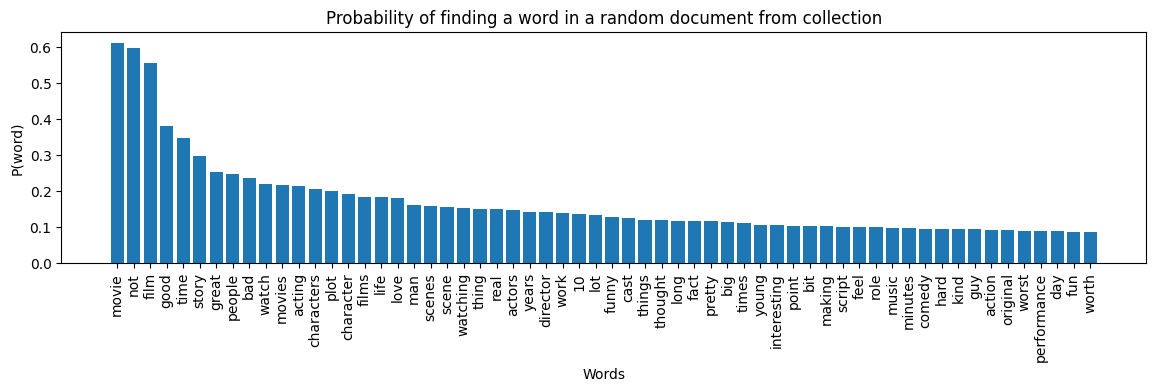

In [21]:
# Ideia: ao inves de somar a frequencia de palavras, verifico:
# (a) a palavra vale 1 se está presente no documento
# (b) a palavra vale 0 caso contrário

reviews = [s for s in df['review']]
vectorizer = CountVectorizer(stop_words = stopwords_en, binary=True)
x = vectorizer.fit_transform(reviews)

x_ = np.mean(x, axis=0)

tuplas = [ (x_[0,vectorizer.vocabulary_[i]], i) for i in vectorizer.vocabulary_.keys() ]
tuplas_ordenadas = sorted(tuplas, reverse=True) # reverse=True pede uma ordenação em ordem decrescente
palavras = [ t[1] for t in tuplas_ordenadas ]
contagens = [ t[0] for t in tuplas_ordenadas ]
eixo_x = np.arange(len(palavras))
n_palavras = 60
plt.figure(figsize=(14,3))
plt.bar(eixo_x[0:n_palavras], contagens[0:n_palavras])
plt.xticks(eixo_x[0:n_palavras], palavras[0:n_palavras], rotation=90)
plt.ylabel('P(word)')
plt.xlabel('Words')
plt.title('Probability of finding a word in a random document from collection')
plt.show()

## Analisando por grupos

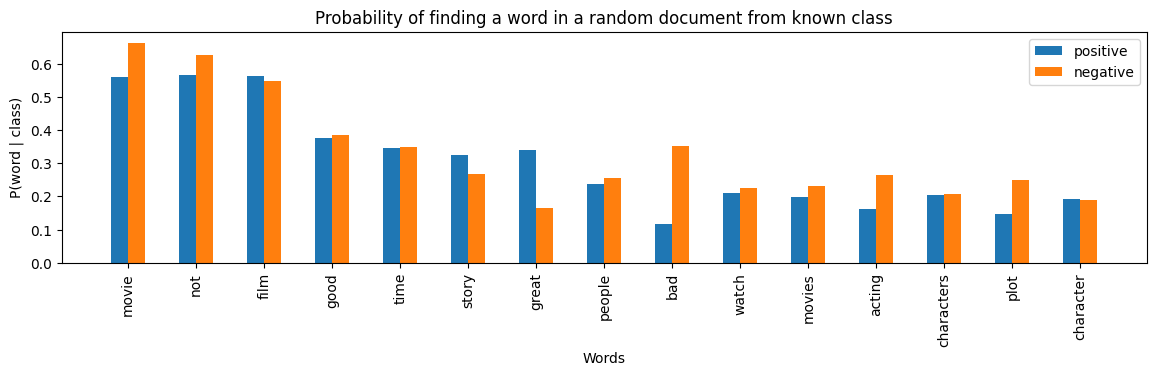

In [22]:
# Passo 1: executar vectorizer ao longo de toda a coleção
reviews = [s for s in df['review']]
vectorizer = CountVectorizer(stop_words = stopwords_en, binary=True)
x = vectorizer.fit_transform(reviews)
x_ = np.mean(x, axis=0)

# Passo 2: escolher somente elementos correspondentes a cada categoria
filtro_pos = df['sentiment']=='positive'
x_pos = x[filtro_pos,:] # Escolho linhas com sentimento positivo
x_pos_ = np.mean(x_pos, axis=0)
filtro_neg = df['sentiment']=='negative'
x_neg = x[filtro_neg,:] # Escolho linhas com sentimento negativo
x_neg_ = np.mean(x_neg, axis=0)

# Passo 3: ordenar palavras de acordo com a soma geral. Vou incluir tambem a contagem nos grupos positivo e negativo!
tuplas = [ (\
            x_[0,vectorizer.vocabulary_[i]],\
            i,\
            x_pos_[0, vectorizer.vocabulary_[i]],\
            x_neg_[0, vectorizer.vocabulary_[i]]\
            ) for i in vectorizer.vocabulary_.keys() ]
tuplas_ordenadas = sorted(tuplas, reverse=True)
palavras = [ t[1] for t in tuplas_ordenadas ]
contagens_pos = [ t[2] for t in tuplas_ordenadas ]
contagens_neg = [ t[3] for t in tuplas_ordenadas ]

eixo_x = np.arange(len(palavras))
n_palavras = 15

plt.figure(figsize=(14,3))
plt.bar(eixo_x[0:n_palavras]-0.125, contagens_pos[0:n_palavras], width=0.25, label='positive')
plt.bar(eixo_x[0:n_palavras]+0.125, contagens_neg[0:n_palavras],  width=0.25, label='negative')
plt.legend()
plt.xticks(eixo_x[0:n_palavras], palavras[0:n_palavras], rotation=90)
plt.ylabel('P(word | class)')
plt.xlabel('Words')
plt.title('Probability of finding a word in a random document from known class')
plt.show()

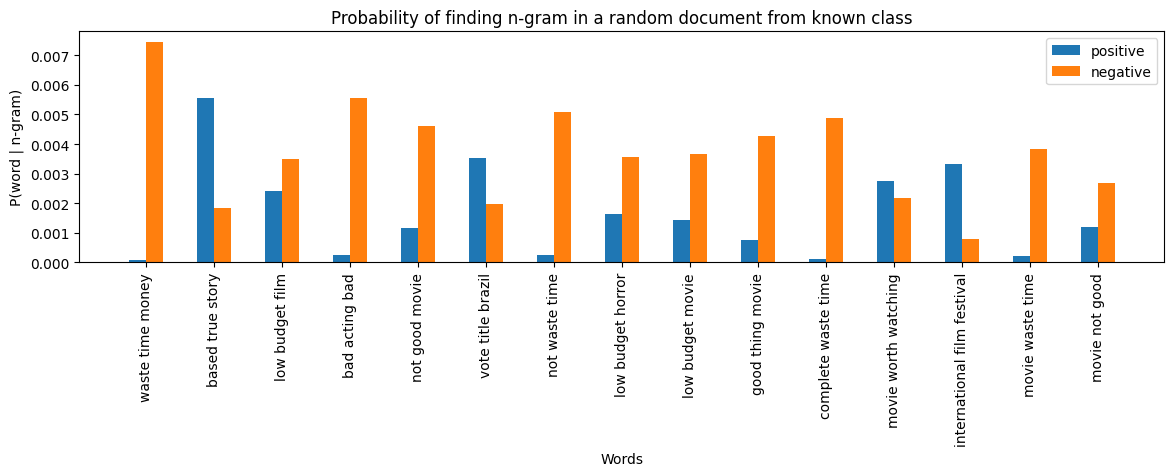

In [24]:
##
Lista_Palavras_Tecnicas =   ["director",
                             "directing",
                             "actor",
                             "actress",
                             "screenplay",
                             "cinematography",
                             "costume",
                             "language",
                             "makeup",
                             "score",
                             "story",
                             "picture",
                             "editing",
                             "mixing",
                             "effects",
                             "lighting",
                             "sfx",
                             "vfx",
                             "sound",
                             "genre",
                             ]



# Passo 1: executar vectorizer ao longo de toda a coleção
reviews = [s for s in df['review']]
vectorizer = CountVectorizer(stop_words = stopwords_en, binary=True, ngram_range=(3,3))
x = vectorizer.fit_transform(reviews)
x_ = np.mean(x, axis=0)

# Passo 2: escolher somente elementos correspondentes a cada categoria
filtro_pos = df['sentiment']=='positive'
x_pos = x[filtro_pos,:] # Escolho linhas com sentimento positivo
x_pos_ = np.mean(x_pos, axis=0)
filtro_neg = df['sentiment']=='negative'
x_neg = x[filtro_neg,:] # Escolho linhas com sentimento negativo
x_neg_ = np.mean(x_neg, axis=0)

# Passo 3: ordenar palavras de acordo com a soma geral. Vou incluir tambem a contagem nos grupos positivo e negativo!
tuplas = [ (\
            x_[0,vectorizer.vocabulary_[i]],\
            i,\
            x_pos_[0, vectorizer.vocabulary_[i]],\
            x_neg_[0, vectorizer.vocabulary_[i]]\
            ) for i in vectorizer.vocabulary_.keys() ]#if i in Lista_Palavras_Tecnicas]
tuplas_ordenadas = sorted(tuplas, reverse=True)
palavras = [ t[1] for t in tuplas_ordenadas ]
contagens_pos = [ t[2] for t in tuplas_ordenadas ]
contagens_neg = [ t[3] for t in tuplas_ordenadas ]

eixo_x = np.arange(len(palavras))
n_palavras = 15

plt.figure(figsize=(14,3))
plt.bar(eixo_x[0:n_palavras]-0.125, contagens_pos[0:n_palavras], width=0.25, label='positive')
plt.bar(eixo_x[0:n_palavras]+0.125, contagens_neg[0:n_palavras],  width=0.25, label='negative')
plt.legend()
plt.xticks(eixo_x[0:n_palavras], palavras[0:n_palavras], rotation=90)
plt.ylabel('P(word | n-gram)')
plt.xlabel('Words')
plt.title('Probability of finding n-gram in a random document from known class')
plt.show()


# 57-64k Composer & music director (Blockbuster poder ir a 500k-1M)
# 77k Screenwriter
# 52k actor


In [29]:
v1 = CountVectorizer(stop_words = stopwords_en, binary=True)
v2 = CountVectorizer(stop_words = stopwords_en, binary=True, ngram_range=(2,2))
v3 = CountVectorizer(stop_words = stopwords_en, binary=True, ngram_range=(3,3))

In [32]:
def get_df(vectorizer):
    reviews = [s for s in df['review']]
    x = vectorizer.fit_transform(reviews)

    x_ = np.mean(x, axis=0)

    tuplas = [ (x_[0,vectorizer.vocabulary_[i]], i) for i in vectorizer.vocabulary_.keys() ]
    tuplas_ordenadas = sorted(tuplas, reverse=True) # reverse=True pede uma ordenação em ordem decrescente
    palavras = [ t[1] for t in tuplas_ordenadas ]
    contagens = [ t[0] for t in tuplas_ordenadas ]
    return palavras, contagens

p1,c1 = get_df(v1)
p2,c2 = get_df(v2)
p3,c3 = get_df(v3)




/home/user/.local/lib/python3.8/site-packages/sklearn/feature_extraction/text.py:396: UserWarning: Your stop_words may be inconsistent with your preprocessing. Tokenizing the stop words generated tokens ['articl', 'mon'] not in stop_words.
  warnings.warn(


In [33]:
print([sorted(x, reverse=True)[:5] for x in [c1,c2,c3]])

[[0.6113200000003298, 0.5957000000003142, 0.5552400000002737, 0.38008000000009856, 0.34666000000006514], [0.050699999999998274, 0.04139999999999865, 0.03945999999999873, 0.03167999999999905, 0.03057999999999909], [0.0037600000000000086, 0.0037000000000000084, 0.0029400000000000064, 0.0029000000000000063, 0.0028800000000000063]]
